<a href="https://colab.research.google.com/github/linson13/MY-PROJECTS/blob/Machine-Learning-And-Artificial-Intelligence-Algorithms/Deep_Learning_Algorithm_on_CIFAR_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


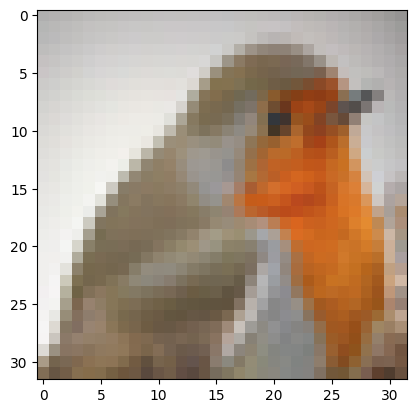

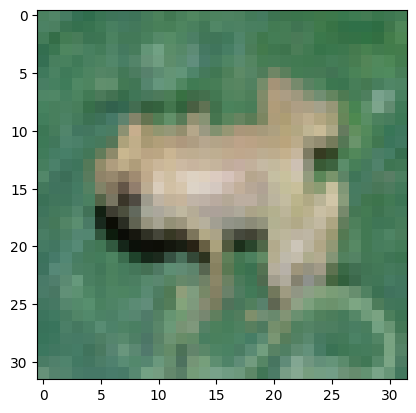

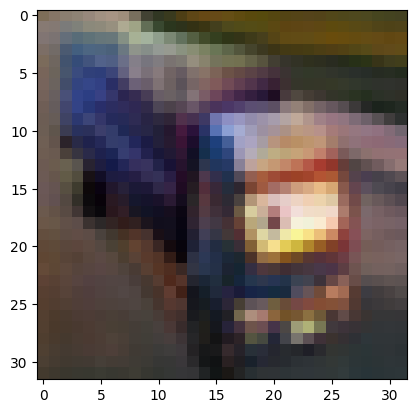

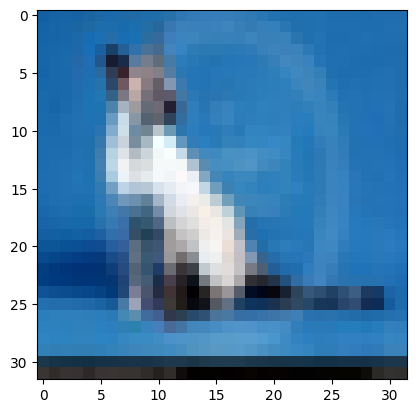

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 498s 313ms/step - accuracy: 0.3265 - loss: 2.0780 - val_accuracy: 0.5674 - val_loss: 1.1811
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 481s 308ms/step - accuracy: 0.5682 - loss: 1.2043 - val_accuracy: 0.6719 - val_loss: 0.9346
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 524s 322ms/step - accuracy: 0.6496 - loss: 0.9949 - val_accuracy: 0.6963 - val_loss: 0.8536
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step
Accuracy score is 69.63000000000001 %
Confusion matrix of Neural Network is 
 [[649  22  57  19  63   3  34  10 117  26]
 [ 11 881   2   1   3   2  26   4  12  58]
 [ 58   3 437  61 162  50 195  17  11   6]
 [  6   3  42 503  60  77 268  15  14  12]
 [  6   1  16  48 710   3 173  31  12   0]
 [  3   0  25 257  63 486 124  36   6   0]
 [  3   0   7  32  18   1 937   0   2   0]
 [  9   0  31  67  86  51  44 704   2   6]
 [ 22  42   7  14  12   0  23   1 855  24]
 [ 25  95   5   9   5   1  31   4  24 801]] 



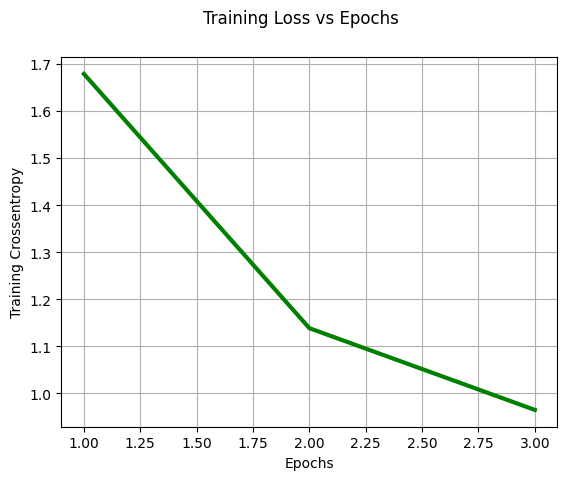

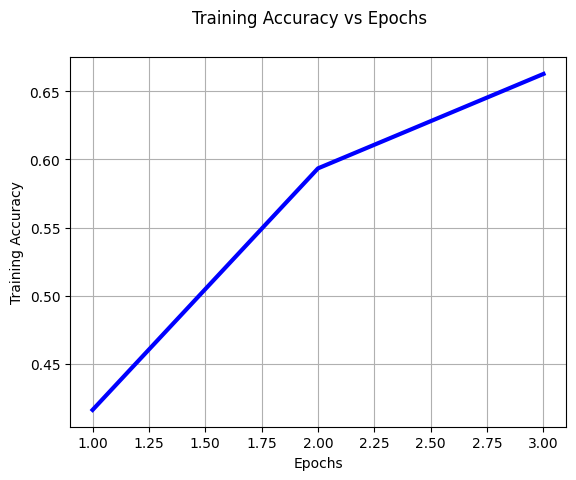

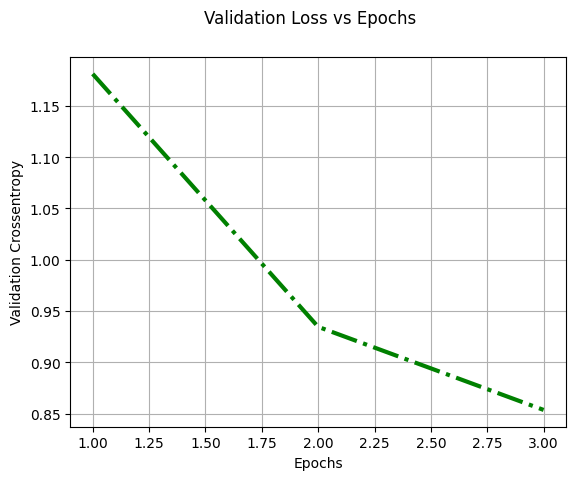

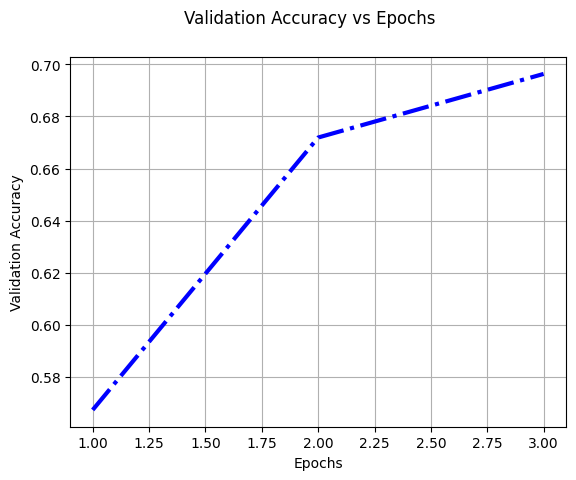

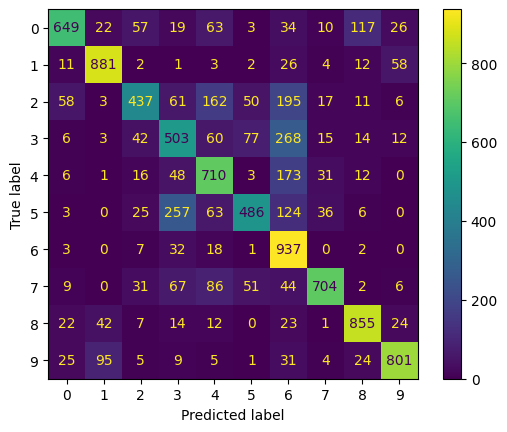

In [1]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


nc = 10

(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()

#Show sample images
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()


plt.figure(2)
imgplot2 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()


plt.figure(3)
imgplot1 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()


plt.figure(4)
imgplot2 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()


Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain/ 255.0
Xtest = Xtest.astype('float32')
Xtest = Xtest / 255.0


ytrain = ytrain[:,0]
ytrainEnc = tf.one_hot(ytrain, depth=nc)
ytest = ytest[:,0]
ytestEnc = tf.one_hot(ytest, depth=nc)



model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))




model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(Xtrain, ytrain, epochs=3, validation_data=(Xtest, ytest))


ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis=1)


score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')


cmat = confusion_matrix(ytest, ypred)
print('Confusion matrix of Neural Network is \n',cmat,'\n')


plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()


disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()
